In [381]:
# Imports
import math
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import colors

In [382]:
# Pandas Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [383]:
# Import CSV
inital_slice = pd.read_csv('240112_150239_Slice1.csv')
middle_slice = pd.read_csv('240112_150239_Slice397.csv')
final_slice = pd.read_csv('240112_150239_Slice793.csv')

overall = pd.read_csv('240112_150239_averages.csv_Zone_Overall.csv')

In [384]:
# Merge Databases
#merged_slices = pd.merge(inital_slice, final_slice, how='outer')

In [385]:
# Clean Up Merged DF

# Tile position can be used for a visualtion in real space but is outside of the scope for this project
#merged_df = merged_df.drop(columns = ['TileX', 'TileZ'])

#merged_with_date = merged_df

#merged_df = merged_df.drop(columns = ['Age']) # Can drop for specific to remove dupes in certine cases, but age can be used for visulizations

#merged_df.drop_duplicates(inplace=True) # Takes df from 1430 rows to 109 (the removed data is duplicate "animals" with separate ages and tiles positions)

C:\Users\ianmh\AppData\Local\Temp\ipykernel_10108\518253392.py:11: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_slices = pd.merge(inital_slice_1, final_slice_1, how='outer')


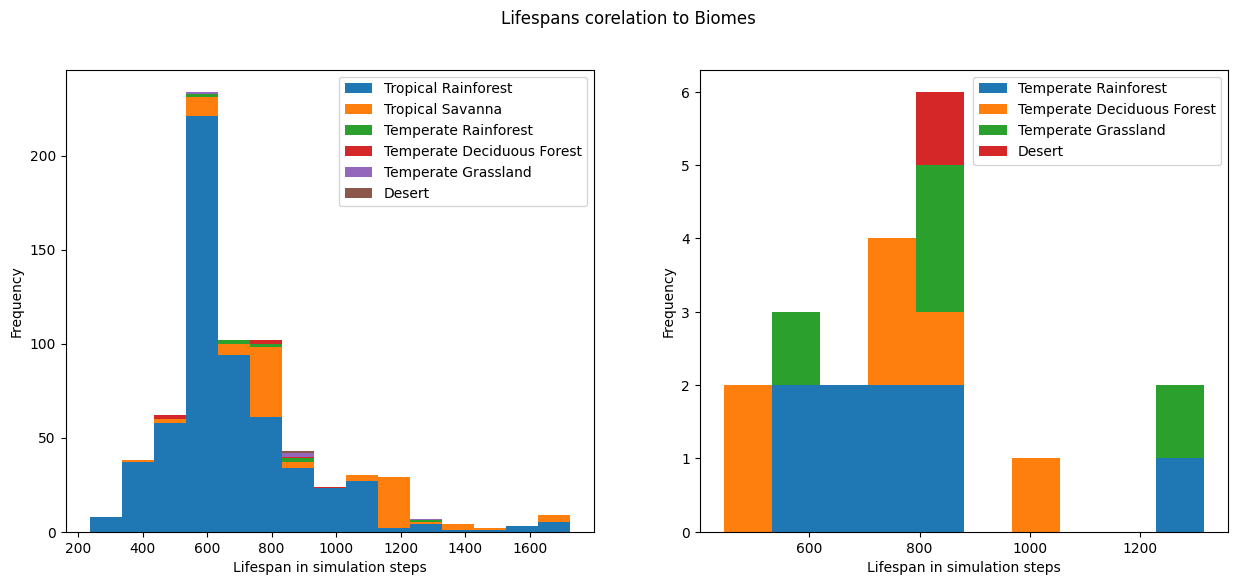

In [430]:
# graph 1

inital_slice_1 = inital_slice.copy()
final_slice_1 = final_slice.copy()

dropped_col = ['Avatar', 'TileX', 'TileZ']

inital_slice_1 = inital_slice_1.drop(columns=dropped_col)
final_slice_1 = final_slice_1.drop(columns=dropped_col)

merged_slices = pd.merge(inital_slice_1, final_slice_1, how='outer')

#print(len(merged_slices))

graph1 = merged_slices.copy()

graph1 = graph1[graph1['Lifespan'] != 1000]

pivoted_g1 = graph1.pivot(values='Lifespan', columns='Biome')

non_nan_counts = pivoted_g1.notna().sum()
sorted_columns = non_nan_counts.sort_values(ascending=False).index
pivoted_g1 = pivoted_g1[sorted_columns]

stacked_data = []

for col in pivoted_g1:
    stacked_data.append(pivoted_g1[col][pivoted_g1[col].notna()])

fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

fig.suptitle('Lifespans corelation to Biomes')

plt.setp(axs, xlabel='Lifespan in simulation steps')
plt.setp(axs, ylabel='Frequency')

axs[0].hist(stacked_data, stacked=True, bins=15)
axs[0].legend(labels=pivoted_g1.columns, loc='upper right')

stacked_data_without_majority = stacked_data[2:]

axs[1].hist(stacked_data_without_majority, stacked=True, bins=10)
axs[1].legend(labels=pivoted_g1.columns[2:], loc='upper right')

plt.show()

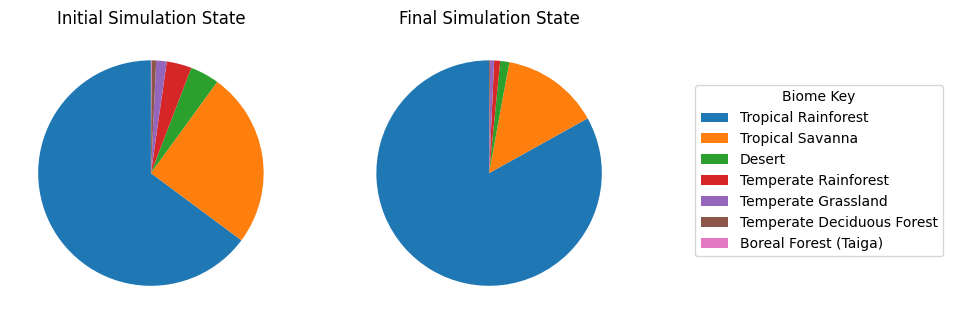

In [387]:
# Pie Chart Visualization for biomes

intial_counts = inital_slice['Biome'].value_counts() # this is a dict
final_counts = final_slice['Biome'].value_counts() # this is a dict

labels = list(intial_counts.keys())

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

wedges, _ = axs[0].pie(
    intial_counts, startangle=90
)

axs[1].pie(final_counts, startangle=90)

axs[0].set_title('Initial Simulation State')
axs[1].set_title('Final Simulation State')

fig.legend(wedges, labels, title="Biome Key", loc="center right", bbox_to_anchor=(1, 0, 0.3, 1))
plt.show()

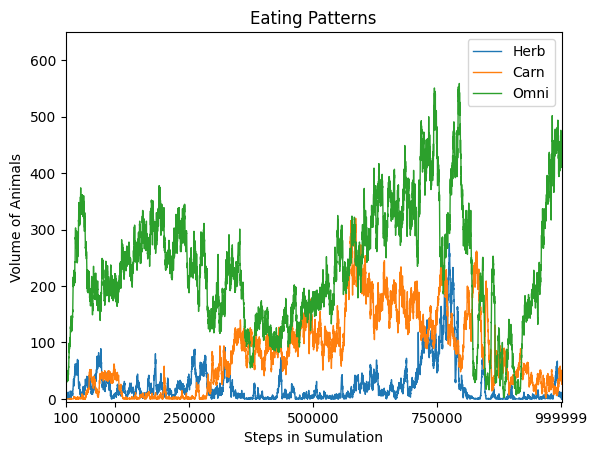

In [421]:
# Graph visualizing eating patterns over the epochs

# remove first turn
graph_5_data = overall.copy()

fig, ax = plt.subplots()

ax.plot(graph_5_data['Turn'], graph_5_data['Herbivores'], linewidth=1)
ax.plot(graph_5_data['Turn'], graph_5_data['Carnivores'], linewidth=1)
ax.plot(graph_5_data['Turn'], graph_5_data['Omnivores'], linewidth=1)

plt.title("Eating Patterns")
plt.ylabel('Volume of Animals')
plt.xlabel('Steps in Sumulation')

plt.legend(['Herb', 'Carn', 'Omni'])
plt.ylim(-5,650)
plt.xlim(0, 1_001_800)
plt.xticks([100, 100000, 250000, 500000, 750000, 999999])


plt.show()


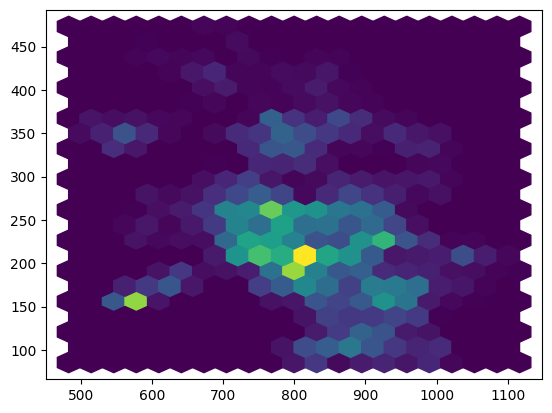

In [389]:
# Other testing

overall.sort_values(by=['Lifespan (Average)'], inplace=True)
plt.hexbin(overall['Lifespan (Average)'], overall['Courage (Average)'], gridsize=20)

plt.show()

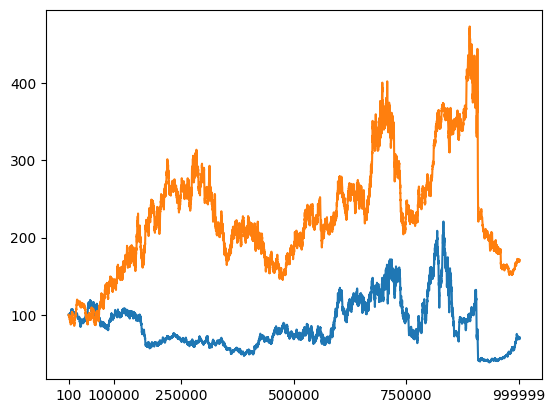

In [390]:
fig, ax = plt.subplots()

overall.sort_values(by=['Turn'], inplace=True)

ax.plot(overall['Turn'], overall['Intimidation (Average)'])
ax.plot(overall['Turn'], overall['Courage (Average)'])

plt.xticks([100, 100000, 250000, 500000, 750000, 999999])

plt.show()

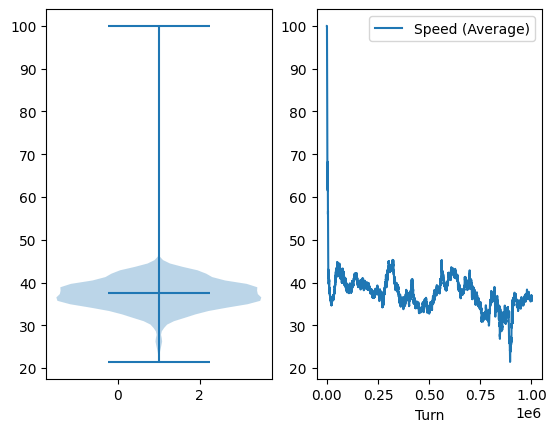

In [391]:
# Throughout the entire simulation speed seemed hover around the area

graph_6 = overall.copy()

#graph_6.plot(y='Speed (Average)', kind='kde', legend=True)


fig, ax = plt.subplots(1, 2)
graph_6.plot(x='Turn', y='Speed (Average)', kind='line', ax=ax[1], legend=True)

vp = ax[0].violinplot(graph_6['Speed (Average)'], widths=5,
                   showmeans=True, showmedians=False, showextrema=True)